---
# <center>Setup<center>
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# A customized pallete with a specific font
my_colors=sns.set_palette("icefire", n_colors=8)
sns.set_theme(style="darkgrid", palette=my_colors, font="verdana")

In [3]:
pd.set_option("display.max_rows", 20)
pd.set_option("display.max_columns", None)

---
# <center>Read and Inspect Data<center>
---

In [4]:
df = pd.read_csv("F:/obesity_detection/dataset/ObesityDataSet.csv")
df.shape

(2111, 17)

In [5]:
df.sample(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
1769,Male,25.137087,1.772045,114.067936,yes,yes,1.624366,3.000000,Sometimes,no,2.081719,no,1.538922,0.356868,Sometimes,Public_Transportation,Obesity_Type_II
1429,Male,36.673882,1.792100,101.285765,yes,yes,2.222282,1.578751,Sometimes,no,2.791604,no,2.352091,0.317846,Sometimes,Automobile,Obesity_Type_I
866,Female,18.000000,1.498561,55.376512,no,yes,2.000000,3.000000,Sometimes,no,1.274718,yes,0.129902,0.978574,Sometimes,Public_Transportation,Overweight_Level_I
1972,Female,18.301773,1.808765,140.292018,yes,yes,3.000000,3.000000,Sometimes,no,2.830247,no,1.783138,0.789064,Sometimes,Public_Transportation,Obesity_Type_III
1292,Male,23.887569,1.657995,90.000000,yes,yes,2.000000,3.000000,Sometimes,no,3.000000,no,0.603638,0.969085,no,Public_Transportation,Obesity_Type_I
951,Female,17.420269,1.489409,53.620604,no,yes,1.836554,1.865238,Sometimes,no,2.000000,yes,0.320209,1.969507,Sometimes,Public_Transportation,Overweight_Level_I
709,Female,18.019572,1.701378,50.088468,no,yes,1.601236,3.433908,Sometimes,no,1.055019,no,0.819269,1.030848,Sometimes,Public_Transportation,Insufficient_Weight
1350,Male,20.491475,1.975663,120.702935,yes,yes,2.000000,3.000000,Sometimes,no,3.000000,no,0.767013,1.000000,Sometimes,Public_Transportation,Obesity_Type_I
518,Female,23.501249,1.600000,45.000000,no,no,2.591439,3.000000,Frequently,no,2.074048,no,1.679935,0.000000,no,Public_Transportation,Insufficient_Weight
504,Female,26.000000,1.630927,111.485516,yes,yes,3.000000,3.000000,Sometimes,no,2.444125,no,0.000000,0.265790,Sometimes,Public_Transportation,Obesity_Type_III


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

---
# <center>Clean Data<center>
---

#### **1. Checking for NA Values**

In [7]:
from utils import check_na
check_na(df)

,feature,missing#,missing%


#### **2. Checking for Duplications**

In [8]:
df.duplicated().sum()

np.int64(24)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

np.int64(0)

---
# <center>Data Consistency<center>
---

In [11]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

#### **Renaming Columns**

In [12]:
col_map = {"FAVC": "frequent_consumption_of_high_caloric_food", "FCVC": "frequency_of_consumption_of_vegetables",
           "NCP": "number_of_main_meals", "CH2O": "consumption_of_water_daily", 
           "SCC": "calories_consumption_monitoring", "FAF": "physical_activity_frequency", 
           "TUE": "time_using_technology_devices", "CALC": "consumption_of_alcohol", "MTRANS": "transportation_used", 
           "NObeyesdad": "obesity_category", "CAEC": "consumption_of_food_between_meals"}
df.rename(col_map, axis=1, inplace=True)

In [13]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'frequent_consumption_of_high_caloric_food',
       'frequency_of_consumption_of_vegetables', 'number_of_main_meals',
       'consumption_of_food_between_meals', 'SMOKE',
       'consumption_of_water_daily', 'calories_consumption_monitoring',
       'physical_activity_frequency', 'time_using_technology_devices',
       'consumption_of_alcohol', 'transportation_used', 'obesity_category'],
      dtype='object')

---
# <center>EDA<center>
---

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Gender                                     2087 non-null   object 
 1   Age                                        2087 non-null   float64
 2   Height                                     2087 non-null   float64
 3   Weight                                     2087 non-null   float64
 4   family_history_with_overweight             2087 non-null   object 
 5   frequent_consumption_of_high_caloric_food  2087 non-null   object 
 6   frequency_of_consumption_of_vegetables     2087 non-null   float64
 7   number_of_main_meals                       2087 non-null   float64
 8   consumption_of_food_between_meals          2087 non-null   object 
 9   SMOKE                                      2087 non-null   object 
 10  consumption_of_water_daily   

In [15]:
categorical_columns=["Gender", "family_history_with_overweight", "frequent_consumption_of_high_caloric_food", 
                     "consumption_of_food_between_meals", "SMOKE", "calories_consumption_monitoring",
                     "consumption_of_alcohol", "transportation_used", "obesity_category"]
numer_col = ["Age", "Height", "Weight", "frequency_of_consumption_of_vegetables", "number_of_main_meals", 
             "consumption_of_water_daily", "physical_activity_frequency", "time_using_technology_devices"]

### **1. Categroical Features**

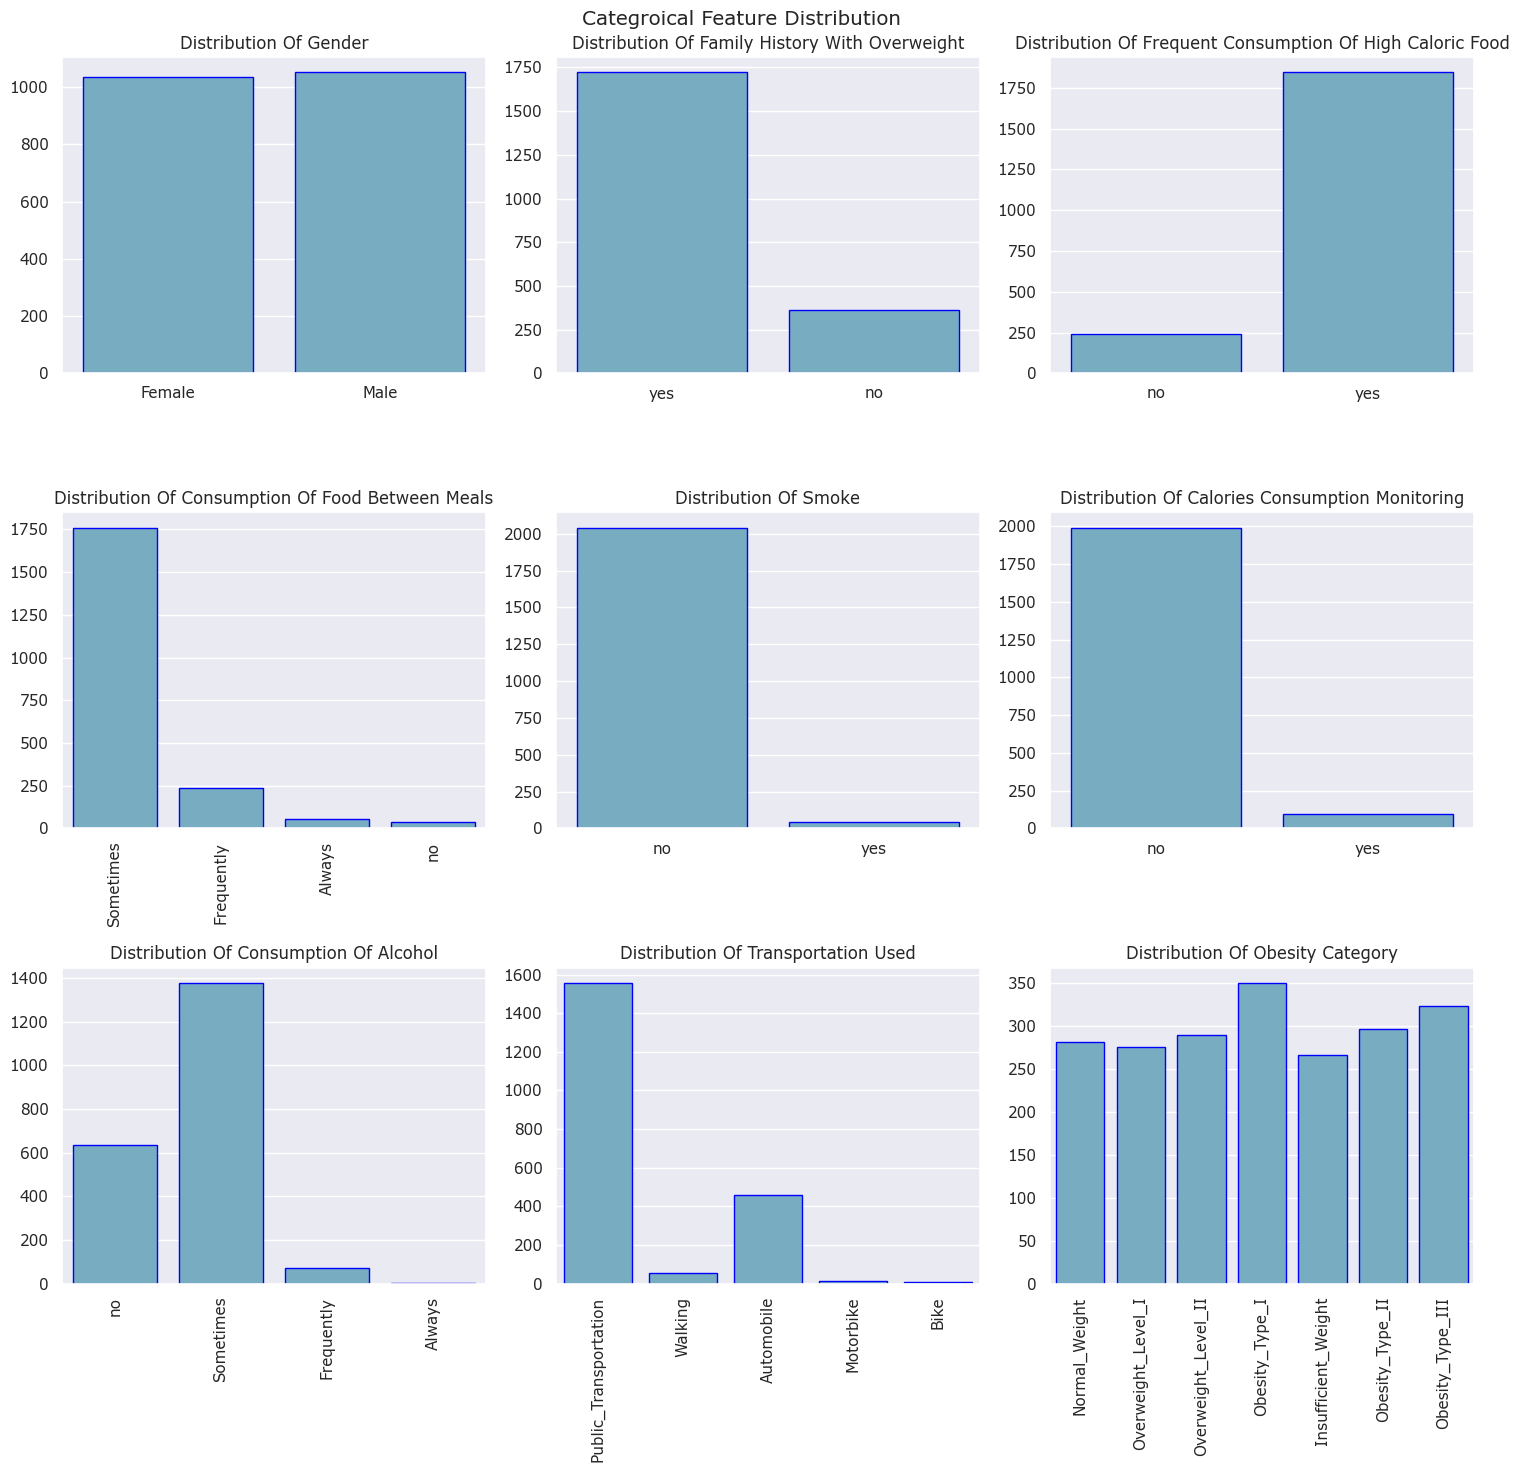

In [16]:
from utils import categorical_visualization
categorical_visualization(df=df, cate_col=categorical_columns, figsize=(15, 15), nunique=3, rotation=90)

### **2. Numerical Features**

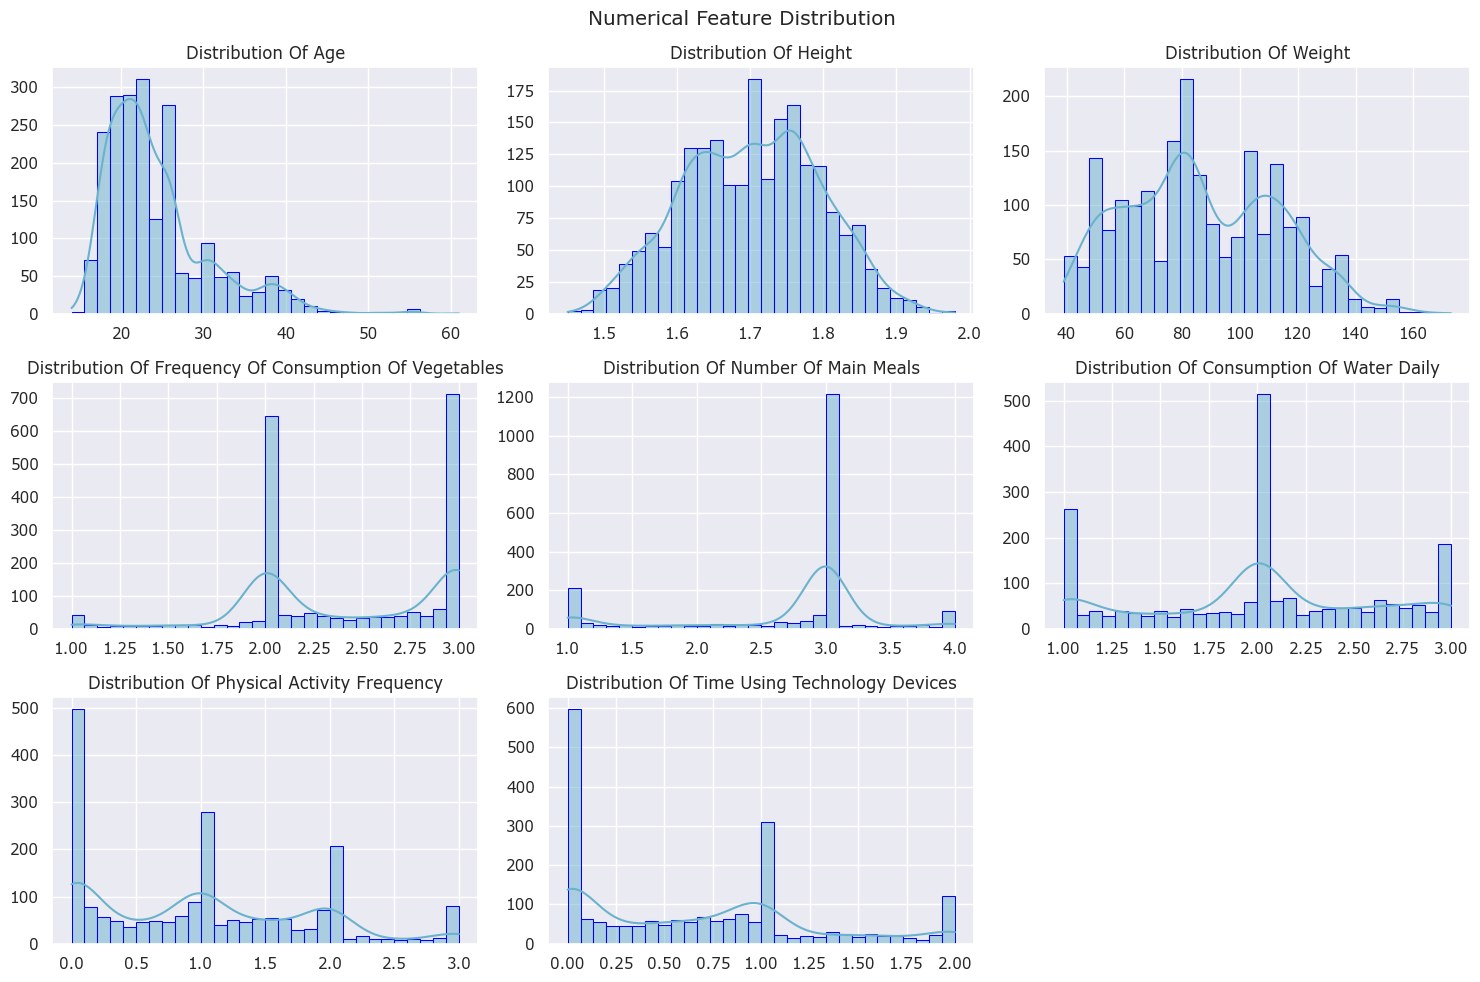

In [17]:
from utils import numerical_visualization
numerical_visualization(df = df, numerical_col= numer_col, figsize=(15, 10), kde=True)

---
# <center>Data Preprocessing<center>
---

#### **1. Splitting the Data**

In [18]:
x = df.drop(columns="obesity_category")
y = df["obesity_category"]

In [19]:
# Splitting the data to 75% train, 25% test
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.25)

#### **2. Encoding Categorical Columns**

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Gender                                     2087 non-null   object 
 1   Age                                        2087 non-null   float64
 2   Height                                     2087 non-null   float64
 3   Weight                                     2087 non-null   float64
 4   family_history_with_overweight             2087 non-null   object 
 5   frequent_consumption_of_high_caloric_food  2087 non-null   object 
 6   frequency_of_consumption_of_vegetables     2087 non-null   float64
 7   number_of_main_meals                       2087 non-null   float64
 8   consumption_of_food_between_meals          2087 non-null   object 
 9   SMOKE                                      2087 non-null   object 
 10  consumption_of_water_daily   

##### **2.1. Encoding Features**

In [21]:
# To see which method of encoding we are going to use based on their value counts
for col in categorical_columns:
    print(df[col].value_counts())
    print(50*"=")

Gender
Male      1052
Female    1035
Name: count, dtype: int64
family_history_with_overweight
yes    1722
no      365
Name: count, dtype: int64
frequent_consumption_of_high_caloric_food
yes    1844
no      243
Name: count, dtype: int64
consumption_of_food_between_meals
Sometimes     1761
Frequently     236
Always          53
no              37
Name: count, dtype: int64
SMOKE
no     2043
yes      44
Name: count, dtype: int64
calories_consumption_monitoring
no     1991
yes      96
Name: count, dtype: int64
consumption_of_alcohol
Sometimes     1380
no             636
Frequently      70
Always           1
Name: count, dtype: int64
transportation_used
Public_Transportation    1558
Automobile                456
Walking                    55
Motorbike                  11
Bike                        7
Name: count, dtype: int64
obesity_category
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Normal_Weight          282
Overweight_Level_

In [22]:
# Selecting only the columns that have 2 categories only
cate_for_label_encoder=["Gender", "family_history_with_overweight",
                        "frequent_consumption_of_high_caloric_food", "SMOKE",
                        "calories_consumption_monitoring"]
ordinal_encoder = OrdinalEncoder()
# Encoding the columns with two 2 categories 
x_train[cate_for_label_encoder]=ordinal_encoder.fit_transform(x_train[cate_for_label_encoder])
x_test[cate_for_label_encoder]=ordinal_encoder.transform(x_test[cate_for_label_encoder])
# Remember yes --> 1, No --> 0
# Remember Female --> 0, Male --> 1 
x_train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,frequent_consumption_of_high_caloric_food,frequency_of_consumption_of_vegetables,number_of_main_meals,consumption_of_food_between_meals,SMOKE,consumption_of_water_daily,calories_consumption_monitoring,physical_activity_frequency,time_using_technology_devices,consumption_of_alcohol,transportation_used
1347,1.0,22.352025,1.754711,105.000706,1.0,1.0,2.871137,3.000000,Sometimes,0.0,2.627569,0.0,1.000000,0.000000,Sometimes,Public_Transportation
1695,1.0,24.622054,1.756509,117.368716,1.0,1.0,1.451337,3.000000,Sometimes,0.0,2.000000,0.0,1.384607,0.631217,Sometimes,Public_Transportation
1680,1.0,30.976932,1.755333,118.237782,1.0,1.0,2.938616,3.000000,Sometimes,0.0,2.060390,0.0,0.371508,1.333559,Sometimes,Automobile
1475,1.0,22.200779,1.769328,105.000576,1.0,1.0,2.685484,3.000000,Sometimes,0.0,2.649459,0.0,1.000000,0.000000,Sometimes,Public_Transportation
1478,1.0,19.515324,1.879144,112.932984,1.0,1.0,2.000000,2.152733,Sometimes,0.0,2.533690,0.0,0.917563,1.285838,Sometimes,Public_Transportation


In [23]:
x_test.head()

,Gender,Age,Height,Weight,family_history_with_overweight,frequent_consumption_of_high_caloric_food,frequency_of_consumption_of_vegetables,number_of_main_meals,consumption_of_food_between_meals,SMOKE,consumption_of_water_daily,calories_consumption_monitoring,physical_activity_frequency,time_using_technology_devices,consumption_of_alcohol,transportation_used
1337,0.0,18.603496,1.681719,90.671871,1.0,1.0,1.524428,3.0,Sometimes,0.0,1.383831,0.0,0.130417,1.000000,Sometimes,Public_Transportation
1763,1.0,31.199261,1.848845,125.077863,1.0,1.0,2.496190,3.0,Sometimes,1.0,1.662117,0.0,0.992371,0.217632,Sometimes,Public_Transportation
389,0.0,16.000000,1.610000,65.000000,1.0,1.0,1.000000,1.0,Sometimes,0.0,2.000000,0.0,0.000000,0.000000,no,Public_Transportation
595,1.0,17.210933,1.819557,58.325122,1.0,1.0,2.559600,4.0,Sometimes,0.0,2.000000,0.0,2.000000,0.331483,no,Automobile
1735,1.0,26.734476,1.816197,119.622764,1.0,1.0,2.247037,3.0,Sometimes,0.0,2.718408,0.0,0.763595,0.000000,Sometimes,Public_Transportation


In [24]:
# Selecting the columns that have more than two catgories
cate_for_one_hot_encoder = ["consumption_of_food_between_meals", 'consumption_of_alcohol', 'transportation_used']

In [25]:
# Handle unknown because if the test set sees a category the train didn't fit on put all categories as zero
one_hot =OneHotEncoder(handle_unknown="ignore", sparse_output=False)
# Fit the encoder on transform it on the train set
encoded_train = one_hot.fit_transform(x_train[cate_for_one_hot_encoder])
# Transform on the test set without fitting
encoded_test= one_hot.transform(x_test[cate_for_one_hot_encoder])

In [26]:
# Turn them into data frames
encoded_x_train= pd.DataFrame(encoded_train, columns=one_hot.get_feature_names_out(cate_for_one_hot_encoder), index=x_train.index)
encoded_x_test = pd.DataFrame(encoded_test, columns=one_hot.get_feature_names_out(cate_for_one_hot_encoder), index= x_test.index)

In [27]:
# Putting the train set in one data frame after preprocessing
x_train_final = pd.concat([encoded_x_train, x_train.drop(columns=cate_for_one_hot_encoder)], axis=1)
# Putting the test set in one data frame after preprocessing
x_test_final = pd.concat([encoded_x_test, x_test.drop(columns=cate_for_one_hot_encoder)], axis=1)
x_train_final

,consumption_of_food_between_meals_Always,consumption_of_food_between_meals_Frequently,consumption_of_food_between_meals_Sometimes,consumption_of_food_between_meals_no,consumption_of_alcohol_Always,consumption_of_alcohol_Frequently,consumption_of_alcohol_Sometimes,consumption_of_alcohol_no,transportation_used_Automobile,transportation_used_Bike,transportation_used_Motorbike,transportation_used_Public_Transportation,transportation_used_Walking,Gender,Age,Height,Weight,family_history_with_overweight,frequent_consumption_of_high_caloric_food,frequency_of_consumption_of_vegetables,number_of_main_meals,SMOKE,consumption_of_water_daily,calories_consumption_monitoring,physical_activity_frequency,time_using_technology_devices
1347,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,22.352025,1.754711,105.000706,1.0,1.0,2.871137,3.000000,0.0,2.627569,0.0,1.000000,0.000000
1695,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,24.622054,1.756509,117.368716,1.0,1.0,1.451337,3.000000,0.0,2.000000,0.0,1.384607,0.631217
1680,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,30.976932,1.755333,118.237782,1.0,1.0,2.938616,3.000000,0.0,2.060390,0.0,0.371508,1.333559
1475,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,22.200779,1.769328,105.000576,1.0,1.0,2.685484,3.000000,0.0,2.649459,0.0,1.000000,0.000000
1478,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,19.515324,1.879144,112.932984,1.0,1.0,2.000000,2.152733,0.0,2.533690,0.0,0.917563,1.285838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,23.083621,1.848553,121.421121,1.0,1.0,3.000000,2.567567,0.0,2.011023,0.0,0.916478,0.000000
1119,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,35.456326,1.651812,79.437921,1.0,1.0,2.156065,2.909117,0.0,1.221281,0.0,0.503279,1.796136
1154,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,22.882558,1.793451,89.909259,1.0,1.0,1.899116,2.375026,0.0,1.398540,0.0,0.000000,1.365793
1318,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,23.237302,1.761008,97.829344,1.0,1.0,2.000000,3.000000,0.0,2.988771,0.0,2.429923,1.978043


In [28]:
x_test_final

,consumption_of_food_between_meals_Always,consumption_of_food_between_meals_Frequently,consumption_of_food_between_meals_Sometimes,consumption_of_food_between_meals_no,consumption_of_alcohol_Always,consumption_of_alcohol_Frequently,consumption_of_alcohol_Sometimes,consumption_of_alcohol_no,transportation_used_Automobile,transportation_used_Bike,transportation_used_Motorbike,transportation_used_Public_Transportation,transportation_used_Walking,Gender,Age,Height,Weight,family_history_with_overweight,frequent_consumption_of_high_caloric_food,frequency_of_consumption_of_vegetables,number_of_main_meals,SMOKE,consumption_of_water_daily,calories_consumption_monitoring,physical_activity_frequency,time_using_technology_devices
1337,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,18.603496,1.681719,90.671871,1.0,1.0,1.524428,3.000000,0.0,1.383831,0.0,0.130417,1.000000
1763,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,31.199261,1.848845,125.077863,1.0,1.0,2.496190,3.000000,1.0,1.662117,0.0,0.992371,0.217632
389,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,16.000000,1.610000,65.000000,1.0,1.0,1.000000,1.000000,0.0,2.000000,0.0,0.000000,0.000000
595,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,17.210933,1.819557,58.325122,1.0,1.0,2.559600,4.000000,0.0,2.000000,0.0,2.000000,0.331483
1735,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,26.734476,1.816197,119.622764,1.0,1.0,2.247037,3.000000,0.0,2.718408,0.0,0.763595,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,33.954433,1.682253,77.431678,1.0,1.0,3.000000,2.049908,0.0,1.999882,0.0,1.637368,0.107240
1599,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,20.184451,1.701284,104.578255,1.0,1.0,2.653721,1.265463,0.0,1.368457,0.0,0.218356,0.768071
372,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,18.000000,1.620000,58.000000,0.0,1.0,3.000000,3.000000,0.0,1.000000,0.0,0.000000,2.000000
1638,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,32.290160,1.754956,120.098812,1.0,1.0,2.967300,3.000000,0.0,2.530035,0.0,0.955317,1.339232


##### **2.1. Scaling Numerical Features**

In [29]:
min_max_scaler = MinMaxScaler()
x_train_final[numer_col] = min_max_scaler.fit_transform(x_train_final[numer_col])
x_train_final

,consumption_of_food_between_meals_Always,consumption_of_food_between_meals_Frequently,consumption_of_food_between_meals_Sometimes,consumption_of_food_between_meals_no,consumption_of_alcohol_Always,consumption_of_alcohol_Frequently,consumption_of_alcohol_Sometimes,consumption_of_alcohol_no,transportation_used_Automobile,transportation_used_Bike,transportation_used_Motorbike,transportation_used_Public_Transportation,transportation_used_Walking,Gender,Age,Height,Weight,family_history_with_overweight,frequent_consumption_of_high_caloric_food,frequency_of_consumption_of_vegetables,number_of_main_meals,SMOKE,consumption_of_water_daily,calories_consumption_monitoring,physical_activity_frequency,time_using_technology_devices
1347,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.159827,0.579670,0.492543,1.0,1.0,0.935569,0.666667,0.0,0.813784,0.0,0.333333,0.000000
1695,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.209175,0.583090,0.584841,1.0,1.0,0.225669,0.666667,0.0,0.500000,0.0,0.461536,0.315609
1680,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.347325,0.580853,0.591327,1.0,1.0,0.969308,0.666667,0.0,0.530195,0.0,0.123836,0.666779
1475,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.156539,0.607477,0.492542,1.0,1.0,0.842742,0.666667,0.0,0.824729,0.0,0.333333,0.000000
1478,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.098159,0.816386,0.551739,1.0,1.0,0.500000,0.384244,0.0,0.766845,0.0,0.305854,0.642919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.175731,0.758191,0.615083,1.0,1.0,1.000000,0.522522,0.0,0.505511,0.0,0.305493,0.000000
1119,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.444703,0.383919,0.301776,1.0,1.0,0.578032,0.636372,0.0,0.110641,0.0,0.167760,0.898068
1154,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.171360,0.653367,0.379920,1.0,1.0,0.449558,0.458342,0.0,0.199270,0.0,0.000000,0.682897
1318,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.179072,0.591649,0.439025,1.0,1.0,0.500000,0.666667,0.0,0.994385,0.0,0.809974,0.989021


In [30]:
x_test_final[numer_col] = min_max_scaler.transform(x_test_final[numer_col])
x_test_final

,consumption_of_food_between_meals_Always,consumption_of_food_between_meals_Frequently,consumption_of_food_between_meals_Sometimes,consumption_of_food_between_meals_no,consumption_of_alcohol_Always,consumption_of_alcohol_Frequently,consumption_of_alcohol_Sometimes,consumption_of_alcohol_no,transportation_used_Automobile,transportation_used_Bike,transportation_used_Motorbike,transportation_used_Public_Transportation,transportation_used_Walking,Gender,Age,Height,Weight,family_history_with_overweight,frequent_consumption_of_high_caloric_food,frequency_of_consumption_of_vegetables,number_of_main_meals,SMOKE,consumption_of_water_daily,calories_consumption_monitoring,physical_activity_frequency,time_using_technology_devices
1337,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.078337,0.440813,0.385611,1.0,1.0,0.262214,0.666667,0.0,0.191916,0.0,0.043472,0.500000
1763,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.352158,0.758747,0.642372,1.0,1.0,0.748095,0.666667,1.0,0.331059,0.0,0.330790,0.108816
389,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.021739,0.304378,0.194030,1.0,1.0,0.000000,0.000000,0.0,0.500000,0.0,0.000000,0.000000
595,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.048064,0.703030,0.144217,1.0,1.0,0.779800,1.000000,0.0,0.500000,0.0,0.666667,0.165742
1735,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.255097,0.696638,0.601662,1.0,1.0,0.623519,0.666667,0.0,0.859204,0.0,0.254532,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.412053,0.441829,0.286804,1.0,1.0,1.000000,0.349969,0.0,0.499941,0.0,0.545789,0.053620
1599,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.112705,0.478033,0.489390,1.0,1.0,0.826860,0.088488,0.0,0.184229,0.0,0.072785,0.384035
372,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.065217,0.323401,0.141791,0.0,1.0,1.000000,0.666667,0.0,0.000000,0.0,0.000000,1.000000
1638,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.375873,0.580136,0.605215,1.0,1.0,0.983650,0.666667,0.0,0.765017,0.0,0.318439,0.669616


##### **2.3. Encoding Target Variable**

In [31]:
# Optoinal
label_encoder = LabelEncoder()
final_y_train = label_encoder.fit_transform(y_train)
final_y_test = label_encoder.transform(y_test)
# Remember 'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Obesity_Type_I': 2, 'Obesity_Type_II': 3, 
# 'Obesity_Type_III': 4, 'Overweight_Level_I': 5, 'Overweight_Level_II': 6

---
# <center>Model Training and Testing<center>
---

### **1. Training**

In [32]:
# Calling Logistic Model and finding the parameters
log_reg = LogisticRegression(max_iter=10000, verbose=42)
log_reg.fit(x_train_final, y_train)

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s


LogisticRegression(max_iter=10000, verbose=42)

### **2. Testing**

In [33]:
# Prediction
y_pred = log_reg.predict(x_test_final)

### **3. Evaluation**

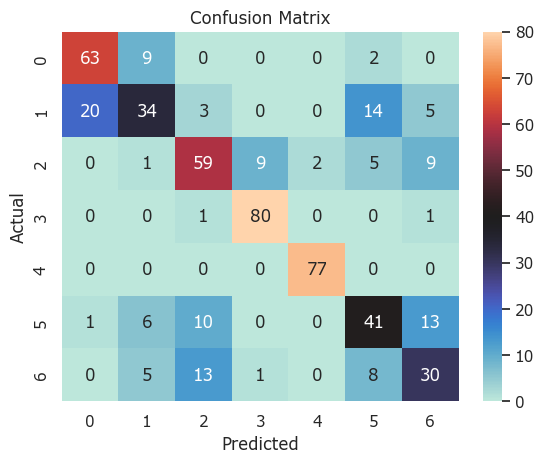

In [34]:
# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="icefire")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [35]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.75      0.85      0.80        74
      Normal_Weight       0.62      0.45      0.52        76
     Obesity_Type_I       0.69      0.69      0.69        85
    Obesity_Type_II       0.89      0.98      0.93        82
   Obesity_Type_III       0.97      1.00      0.99        77
 Overweight_Level_I       0.59      0.58      0.58        71
Overweight_Level_II       0.52      0.53      0.52        57

           accuracy                           0.74       522
          macro avg       0.72      0.72      0.72       522
       weighted avg       0.73      0.74      0.73       522



### **4. Prediciting**

In [36]:
def preprocess (value: dict, one_hot: OneHotEncoder, min_max_scaler: MinMaxScaler, ordinal_encoder: OrdinalEncoder) -> pd.DataFrame:
    """
        The function transforms the entered value into a data frame then passes it thruogh ordinal_encoding, one_hot_encoding
        and min_max_scaling and returns a preprocessed data frame

        Parameters:
            1. value: the values of the features we want to predict (dict)
            2. one_hot: an object of the OneHotEncoder (OneHotEncoder) 
            3. min_max_scaler: an object of the MinMaxScaler (MinMaxScaler)
            4. ordinal_encoder: an object of the OrdinalEncoder (OrdinalEncoder)

        Return Value:
            the preprocessed values as a data frame
    """
    value_df = pd.DataFrame([value])
    # Encoding categorical features with only two categories
    value_df[cate_for_label_encoder]=ordinal_encoder.transform(value_df[cate_for_label_encoder])
    # One hot encoding
    encoded_value= one_hot.transform(value_df[cate_for_one_hot_encoder])
    encoded_value_df = pd.DataFrame(encoded_value, columns=one_hot.get_feature_names_out(cate_for_one_hot_encoder), index= value_df.index)
    final_value_df = pd.concat([encoded_value_df, value_df.drop(columns=cate_for_one_hot_encoder)], axis=1)
    # Min max scaling
    final_value_df[numer_col] = min_max_scaler.transform(final_value_df[numer_col])

    return final_value_df

### **5. Saving Encoders**

In [39]:
import pickle

# Save encoders
with open("one_hot.pkl", "wb") as f:
    pickle.dump(one_hot, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(min_max_scaler, f)

with open("ordinal.pkl", "wb") as f:
    pickle.dump(ordinal_encoder, f)

### **6. Saving Logistic Regression Model**

In [40]:
file_name = "logistic_model.sav"
pickle.dump(log_reg, open(file_name, 'wb'))

# load the model
load_model = pickle.load(open(file_name, 'rb'))

In [ ]:
value = {
    "Gender": "Male", # Female, Male
    "Age": 21.56, # [16, 70]
    "Height": 1.80, # [1.45: 2.00]
    "Weight": 80, # [40: 180]
    "family_history_with_overweight": "yes", # yes, no
    "frequent_consumption_of_high_caloric_food": "no", # yes, no
    "frequency_of_consumption_of_vegetables": 3, # [1: 3]
    "number_of_main_meals": 3, # [1: 4]
    "consumption_of_food_between_meals": "Frequently", # Sometimes, Frequently, Always, no
    "SMOKE": "no", # no, yes
    "consumption_of_water_daily": 3, # [1: 3]
    "calories_consumption_monitoring": "no", # no, yes
    "physical_activity_frequency": 3, # [0: 3]
    "time_using_technology_devices": 4, # [0: 2]
    "consumption_of_alcohol": "no", # Sometimes, no, Frequently, Always
    "transportation_used": "Public_Transportation" # Public_Transportation, Automobile, Walking, Motorbike, Bike
}

In [ ]:
preprocessed_value = preprocess (value, one_hot, min_max_scaler, ordinal_encoder)
print(load_model.predict(preprocessed_value)[0].replace("_", " "))

Insufficient Weight
